## 1. 머신 러닝 (50점)
데이터 : 학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

In [6]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
raw_df = pd.read_csv('./../data/student_data.csv')

df = raw_df.copy()
df.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [8]:
target_col = 'grade'

1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA) <br>


In [ ]:
# 1. target 확인
_df = df.copy()
_df[f'{target_col}_cat'] = pd.qcut(_df[target_col], 5, labels=False)
# sns.pairplot(data=_df, hue=f'{target_col}_cat')

In [29]:
# 2. object column 확인
object_columns = df.select_dtypes(include='object').columns
for object_column in object_columns:
    display(df[object_column].value_counts())
    print('==')

school
GP    349
MS     46
Name: count, dtype: int64

==


sex
F    208
M    187
Name: count, dtype: int64

==


paid
no     214
yes    181
Name: count, dtype: int64

==


activities
yes    201
no     194
Name: count, dtype: int64

==


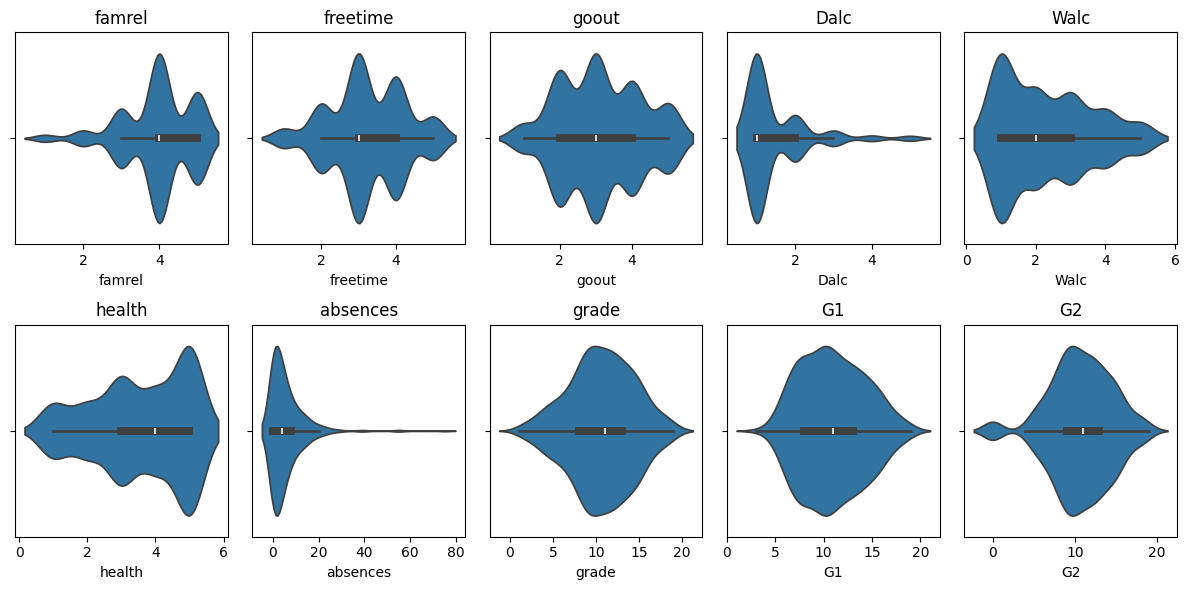

In [34]:
# 3. number column 확인 [violinplot]
number_columns = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for idx, number_column in enumerate(number_columns):
    sns.violinplot(data=df, x=number_column, ax=axes[idx])
    axes[idx].set_title(number_column)
plt.tight_layout()
plt.show()

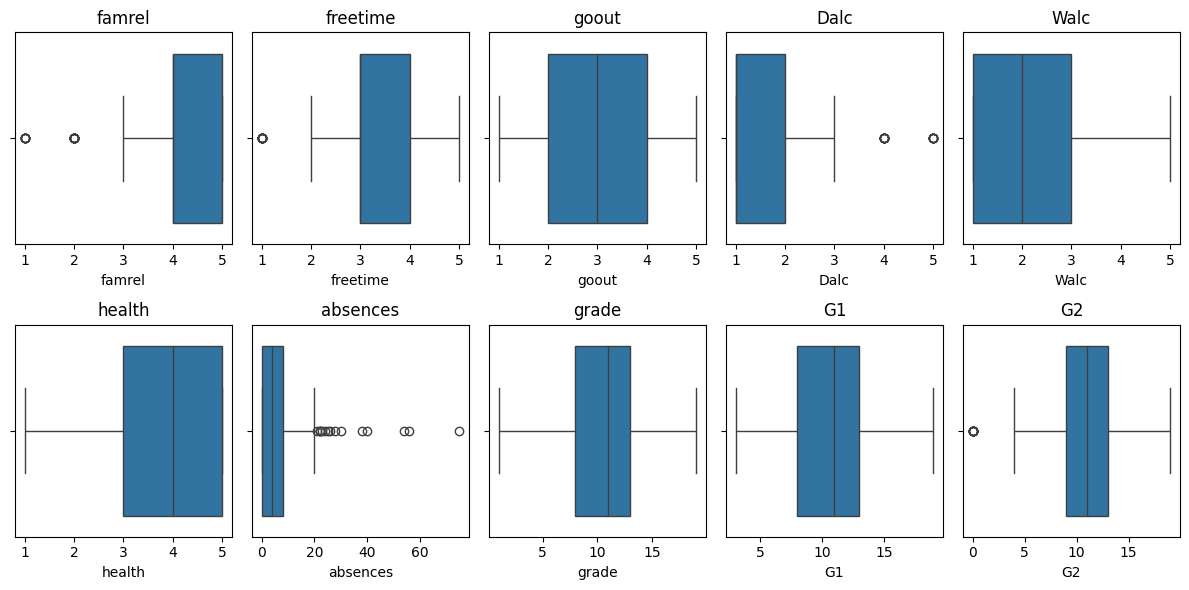

In [35]:
# 3. number column 확인 [boxplot]
number_columns = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for idx, number_column in enumerate(number_columns):
    sns.boxplot(data=df, x=number_column, ax=axes[idx])
    axes[idx].set_title(number_column)
plt.tight_layout()
plt.show()

1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.<br>


In [41]:
df[df.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


In [43]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
number_cols = df.select_dtypes(include='number').columns

imputed_number_arr = imputer.fit_transform(df.loc[:, number_cols])
df.loc[:, number_cols] = imputed_number_arr

```
ANS:

결측치를 예측하는 방법
    1. 대푯값 기반의 대체
        수치형 변수라면 [평균값 / 중앙값]을 통해 대체 할 수 있고, 범주형 변수라면 [최빈값]을 통해 대체할 수 있다.
    2. KNN 대체
        결측치가 없는 수치형 데이터를 활용하여 결측치가 있는 row와 유사한 row를 찾고 이를 기반으로 대체를 할 수 있다.

이번 경우에는 전체 row가 결측치로 이루어진 데이터가 없으며, 결측치 데이터가 대체할 수 있을 정도로 적은편에 속하기에 KNN 대체를 진행한다.
```

1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.<br>


In [51]:
df = pd.concat([
    df.select_dtypes(exclude='object'),
    pd.get_dummies(df.select_dtypes(include='object')).astype(int)
], axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   famrel          395 non-null    float64
 1   freetime        395 non-null    float64
 2   goout           395 non-null    float64
 3   Dalc            395 non-null    float64
 4   Walc            395 non-null    float64
 5   health          395 non-null    float64
 6   absences        395 non-null    float64
 7   grade           395 non-null    int64  
 8   G1              395 non-null    int64  
 9   G2              395 non-null    int64  
 10  school_GP       395 non-null    int64  
 11  school_MS       395 non-null    int64  
 12  sex_F           395 non-null    int64  
 13  sex_M           395 non-null    int64  
 14  paid_no         395 non-null    int64  
 15  paid_yes        395 non-null    int64  
 16  activities_no   395 non-null    int64  
 17  activities_yes  395 non-null    int

```
ANS :
범주형 변수가 존재함을 확인하였고, 모든 범주형 변수가 binary한 형태이며 서열척도가 아니였다.
-> 이에 one-hot-encdoing을 진행하기로 결정하였다.
```

1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.<br>


In [54]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=target_col)
y = df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 17), (79, 17), (316,), (79,))

```
ANS :
1. 랜덤 분할
    랜덤 분할은 가장 일반적으로 활용할 수 있는 데이터 분할법이다.
    test_size를 결정할 수 있으며 일반적인 성능을 측정하는데 유리하다.
2. stratified split(층화 추출법)
    층화 추출법은 데이터의 분포가 불균형할 때 활용할 수 있는 데이터 분할법이다.
    이상치 탐색과 같은 문제에서 활용할 경우 예측하고자 하는 부분에 집중하는데 도움을 줄 수 있다.

이번 경우에는 target_variable이 불균형하지 않은편이며, 연속형 데이터이기 때문에 랜덤분할을 활용한다.
```

1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.<br>


```
SVM, XGBOOST, RANDOMFOREST의 공통점 3가지
    1. classification과 regression 문제 모두에 활용가능합니다.
    2. 과대 적합, 과소 적합의 가능성이 있어 hyper parameter tunning이 필요합니다.

3개의 알고리즘 모두 regression 문제에 활용 가능하며 학생성적을 예측하기에 적합한 알고리즘에 속합니다.
```

1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고, <br>
현업에서 사용시 주의할 점 등에 대해 기술하시오.<br>

In [74]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import r2_score, root_mean_squared_error

In [71]:
Scaler = StandardScaler
Model = SVR

scaler = Scaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Model()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(f'train r2_score  : {r2_score(y_train, y_train_pred)}')
print(f'train rmse      : {root_mean_squared_error(y_train, y_train_pred)}')

print(f'test r2_score : {r2_score(y_test, y_test_pred)}')
print(f'test rmse : {root_mean_squared_error(y_test, y_test_pred)}')

train r2_score  : 0.9150906463171751
train rmse      : 1.0645195090889616
test r2_score : 0.8909766211688958
test rmse : 1.3021926576105767


In [75]:
def model_pipeline(Scaler, Model):
    scaler = Scaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Model()
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    result = {
        'train_r2_score':r2_score(y_train, y_train_pred),
        'train_rmse':root_mean_squared_error(y_train, y_train_pred),
        'test_r2_score':r2_score(y_test, y_test_pred),
        'test_rmse':root_mean_squared_error(y_test, y_test_pred),
    }
    return result

In [82]:
model_results = {}
for Scaler in [StandardScaler, RobustScaler, MinMaxScaler]:
    for Model in [SVR, XGBRegressor, RandomForestRegressor]:
        model_results[f'{Model.__name__}_{Scaler.__name__}'] = model_pipeline(Scaler, Model)

model_result_df = pd.DataFrame(model_results).T
model_result_df.sort_values('test_rmse')

,train_r2_score,train_rmse,test_r2_score,test_rmse
RandomForestRegressor_RobustScaler,0.994939,0.259902,0.957074,0.817101
RandomForestRegressor_StandardScaler,0.995064,0.256651,0.955973,0.827513
RandomForestRegressor_MinMaxScaler,0.994858,0.261953,0.955580,0.831200
XGBRegressor_StandardScaler,0.999999,0.004080,0.949300,0.888010
XGBRegressor_RobustScaler,0.999999,0.004080,0.949300,0.888010
XGBRegressor_MinMaxScaler,0.999999,0.004080,0.949300,0.888010
SVR_RobustScaler,0.935568,0.927313,0.902545,1.231168
SVR_StandardScaler,0.915091,1.064520,0.890977,1.302193
SVR_MinMaxScaler,0.885429,1.236554,0.882829,1.349975


```
ANS :
SVM은 RandomForestRegressor와 XGBR 대비 낮은 성능을 보였다.
RandomForestRegressor가 test에서는 가장 좋은 성능을 보였다.
XGBR가 train에서는 가장 좋은 성능을 보였다.
-> 결론적으로는 RandomForestRegressor를 선택하여 예측문제를 풀어나가는 것이 맞다고 결론을 내린다.
다만, XGBR와 RandomForestRegressor 둘다 train_rmse와 test_rmse에 유의미한 차이가 있다고 할 수 있기 때문에 과적합을 막기 위해 차원축소와 같은 작업을 고려해볼 수 있다.
```

##  2. 통계분석 (50점) 

2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 )

In [ ]:
import mglearn
X,y = mglearn.datasets.load_extended_boston()

2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오<br>

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train R2-Score   :', r2_score(y_train, y_train_pred))
print('Train RMSE   :', root_mean_squared_error(y_train, y_train_pred))
print('==')
print('Test R2-Score   :', r2_score(y_test, y_test_pred))
print('Test RMSE   :', root_mean_squared_error(y_test, y_test_pred))

Train R2-Score   : 0.9409317027113497
Train RMSE   : 2.2652735031519056
==
Test R2-Score   : 0.8055829447972134
Test RMSE   : 3.7758890567533494


2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. <br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br> <br>

In [108]:
import numpy as np

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

alpha_r2_dict = dict()
alphas = np.arange(0, 1.1, 0.1)
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    
    alpha_r2_dict[alpha] = r2_score(y_train, y_train_pred)

alpha = sorted(alpha_r2_dict, key=lambda x: (-alpha_r2_dict[x], x))[0]

model = Ridge(alpha)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train R2-Score   :', r2_score(y_train, y_train_pred))
print('Train RMSE   :', root_mean_squared_error(y_train, y_train_pred))
print('==')
print('Test R2-Score   :', r2_score(y_test, y_test_pred))
print('Test RMSE   :', root_mean_squared_error(y_test, y_test_pred))

Train R2-Score   : 0.94093170271135
Train RMSE   : 2.265273503151902
==
Test R2-Score   : 0.8055829447969338
Test RMSE   : 3.7758890567560637


/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07602e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07602e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.<br>
alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산<br>


In [109]:
import numpy as np

from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, root_mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

alpha_r2_dict = dict()
alphas = np.arange(0, 1.1, 0.1)
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    
    alpha_r2_dict[alpha] = r2_score(y_train, y_train_pred)

alpha = sorted(alpha_r2_dict, key=lambda x: (-alpha_r2_dict[x], x))[0]

model = Lasso(alpha)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train R2-Score   :', r2_score(y_train, y_train_pred))
print('Train RMSE   :', root_mean_squared_error(y_train, y_train_pred))
print('==')
print('Test R2-Score   :', r2_score(y_test, y_test_pred))
print('Test RMSE   :', root_mean_squared_error(y_test, y_test_pred))

Train R2-Score   : 0.9333688057163705
Train RMSE   : 2.405925736358877
==
Test R2-Score   : 0.793045911322387
Test RMSE   : 3.8957318007309385


/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+03, tolerance: 3.510e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn

3. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. <br>

In [112]:
import pandas as pd
import numpy as np

## 데이터 불러오기 
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

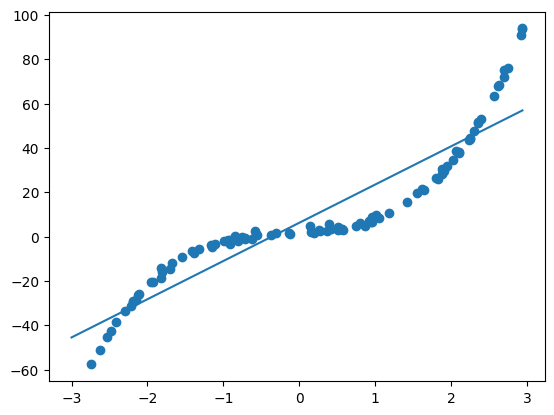

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

plt.scatter(X, y)
plt.plot(line, lr.predict(line))

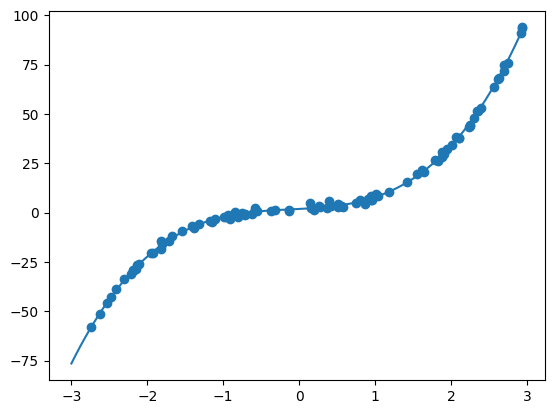

In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)
line_poly = poly.transform(line)


lr = LinearRegression()
lr.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(line, lr.predict(line_poly))

In [127]:
lr.coef_

array([[1.996, 0.978, 3.004]])

4. ANOVA분석 (9점)<br>
변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>

분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 
<br> 


In [134]:
import pandas as pd
raw_df = pd.read_csv('../data/avocado.csv')

df = raw_df.copy()
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [135]:
df = df[["AveragePrice","type","region"]]
df = df[(df['region']=='Orlando') | (df['region']=='Boston' )| (df['region']=='Chicago')].reset_index(drop=True)
df


,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [136]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

avocado_price = df["AveragePrice"]
avocado_type = df["type"]
avocado_region = df["region"]

## 분산분석 수행 
formula = 'avocado_price ~C(avocado_type)*C(avocado_region)' 
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(avocado_region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(avocado_region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


In [ ]:
# C(avocado_type):C(avocado_region)	1.878817	2.0	13.866003	1.146622e-06
# -> avocado_type과 avocado_region 간에 상호작용 효과가 유의미하다.

# C(avocado_type)	56.111007	1.0	828.218296	1.989417e-133
# -> avocado_type과 price 간의 효과가 유의미하다.

# C(avocado_region)	0.432136	2.0	3.189242	4.161918e-02
# -> avocado_region과 price 간의 효과가 유의미하다.

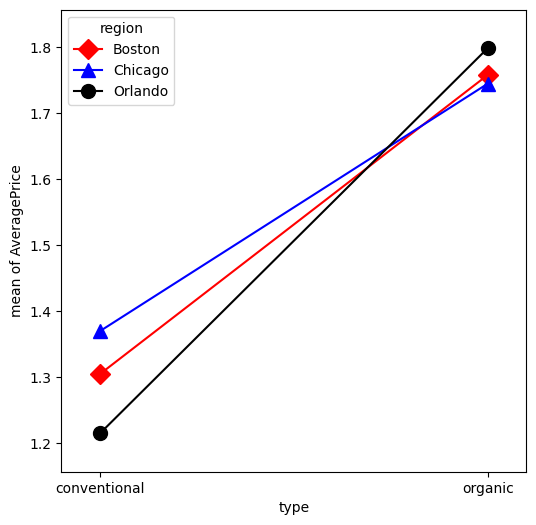

In [137]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, avocado_region, avocado_price, colors=[
                       'red', 'blue', 'black'], markers=['D', '^', 'o'], ms=10, ax=ax)